# Implementing a simple "Convolution" function

In [1]:
# imports
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F


Complete the `conv2d` function. Please note that this function takes a 2D-image (without the channel dimension) and performs cross-correlation with the given 2D-kernel (without the in-channel and out-channel dimensions).

In [2]:
def conv2d(x: torch.Tensor, k: torch.Tensor, s: int = 1) -> torch.Tensor:
    """
    Applies a 2D convolution over an input signal composed of several input planes.

    Args:
    - x: input tensor of shape (H, W)
    - k: kernel tensor of shape (HH, WW)
    - s: symmetric stride of the convolution (default: 1)

    Returns:
    - output: output tensor of shape (H', W')
    """
    H, W = x.shape
    HH, WW = k.shape
    assert H >= HH, "input height must be at least as large as kernel height"
    assert W >= WW, "input width must be at least as large as kernel width"
    assert s <= HH and s <= WW, "stride must be smaller than or equal to kernel size"
    assert (H - HH + s)%s == 0, "invalid stride for input height"
    assert (W - WW + s)%s == 0, "invalid stride for input width"

    # output shape based on the stride and input and kernel shapes
    H_out = (H - HH + s) // s
    W_out = (W - WW + s) // s

    # pre-allocation of output tensor
    output = torch.zeros(H_out, W_out)

    # cross-correlation ("convolution") using nested for loops
    for i in range(H_out):
        for j in range(W_out):
            # >>>>> YOUR CODE HERE
            # raise NotImplementedError("Replace this line by your code.")
            output[i, j] = torch.dot(x[s*i:s*i+HH, s*j:s*j+WW].ravel(), k.ravel())
            # <<<<< END YOUR CODE

    return output


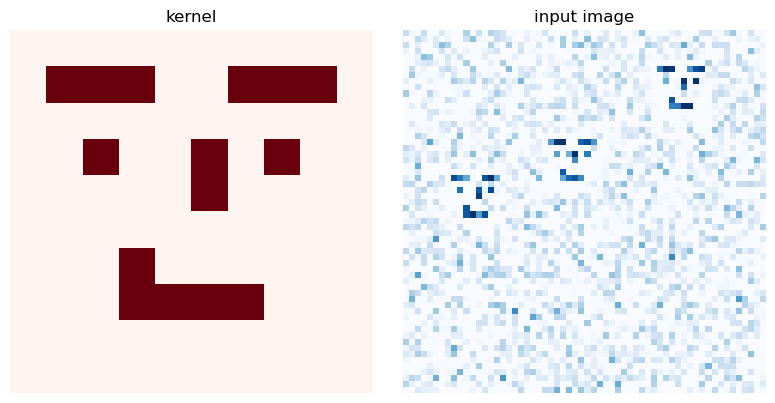

In [3]:
# let's test the function with a toy example
k1 = torch.zeros(10, 10)
k1[1, 1:4] = 1.0
k1[1, 6:9] = 1.0
k1[3, 2:3] = 1.0
k1[3, 7:8] = 1.0
k1[3:5, 5] = 1.0
k1[6, 3] = 1.0
k1[7, 3:7] = 1.0
k1 -= k1.mean()

x = torch.randn(60, 60) / 5
for i in range(3):
    i, j = torch.randint(0, 50, (2,))
    x[i:i+10, j:j+10] += k1
x = torch.clamp(x, 0, 1)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("kernel")
plt.imshow(k1, cmap='Reds')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("input image")
plt.imshow(x, cmap='Blues')
plt.axis('off')
plt.tight_layout()
plt.show()

Use `torch.nn.functional.conv2d` to perform cross-correlation on the toy data and compare your implementation with PyTorch's.

**NOTE:** `torch.nn.functional.conv2d` takes 3D-input tensor (channel, height, width) and 4D-kernel tensor (in-channel and out-channel, kernel dimensions). You can use `.unsqueeze()` to add the necessary dimensions.

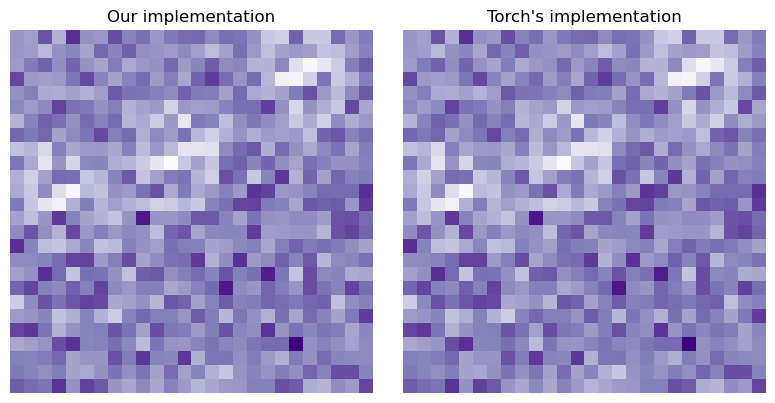

In [4]:
stride = 2
y_ours = conv2d(x, k1, s=stride)

# >>>>> YOUR CODE HERE
# raise NotImplementedError("Replace this line by your code.")
y_torch = F.conv2d(x.unsqueeze(0), k1.unsqueeze(0).unsqueeze(0), stride=stride)
# <<<<< END YOUR CODE

# let's compare the results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Our implementation")
plt.imshow(y_ours, cmap='Purples')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Torch's implementation")
plt.imshow(y_torch[0], cmap='Purples')
plt.axis('off')
plt.tight_layout()
plt.show()